# __Welcome to the MMS Engineering Challenge!__

This notebook provides you some code to setup a MMS Data Engineering problem. There is no optimal solution, but many good answers. We only want to see if you know how to tackle the problem. There is a lot of room for your approach to the problem. 

Goal: We want you to predict the number of __sales_per_day__ (= label) with the given dataset and put it into production.


Short explanation of the dataset: 
- __outlet_id__: The ID of a outlet/market
- __country__: The country in which the outlet is located
- __brand__: "MediaMarkt" or "Saturn"
- __customers_per_day__: The number of customers per day in this outlet 
- __sales_per_day__: The amount of sales for a specific outlet on a specific day
- __currency__: The currency of __sales_per_day__
- __week_id__: Calendar week 
- __weekday__: mon = Monday, tue = Tuesday, ... , sun = Sunday

# Challenge
Now it is your turn. Show us how you are tackeling this problem. You have complete freedom what you do.

## **1). Data Loading**

In [94]:
# Prediction Model developed by:
# Khurram Nazir
# khurram.deutsch@yahoo.com
# Munich, Germany
import pandas as pd
import numpy as np
import io
from google.colab import files
#
uploaded_file = files.upload()
#df = pd.read_csv("C:/Users/khurr/Documents/GitHub/AI-Engineering/PIAIC/Car_Price_Prediction_Assignment/CarPrice_Assignment.csv",sep=',')
df = pd.DataFrame(pd.read_csv(io.BytesIO(uploaded_file['data.csv']),sep=';'))
print(df.head(5))

Saving data.csv to data (4).csv
        brand  country currency  ...  week_id  weekday  sales_per_day
0  MediaMarkt    spain     EURO  ...     34.0      sat       72169.14
1      Saturn  germany     EURO  ...      8.0      mon       52825.62
2  MediaMarkt    italy     EURO  ...     28.0      thu       53309.83
3      Saturn  germany     EURO  ...     47.0      sat       74237.45
4  MediaMarkt    spain     EURO  ...      7.0      tue       56621.61

[5 rows x 8 columns]


### **Exploration / Data Preprocessing**
The goal here is to better understand the underlying data e.g. in terms of completeness, distribution etc..

In [95]:
df = df.sample(frac=1) #Shuffeling DF.
df

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
10946,MediaMarkt,switzerland,CHF,633.0,421.0,50.0,thu,56223.81
9531,MediaMarkt,austria,EURO,2561.0,339.0,7.0,sat,72235.83
17692,MediaMarkt,austria,EURO,365.0,342.0,29.0,tue,51590.19
560,MediaMarkt,spain,EURO,269.0,106.0,31.0,mon,52162.98
5230,Saturn,spain,EURO,342.0,108.0,16.0,thu,61176.34
...,...,...,...,...,...,...,...,...
7059,MediaMarkt,germany,EURO,228.0,99.0,16.0,mon,51260.45
12846,MediaMarkt,netherlands,EURO,0.0,652.0,14.0,sun,0.00
4841,MediaMarkt,switzerland,CHF,630.0,477.0,40.0,thu,67023.32
5582,MediaMarkt,switzerland,CHF,1766.0,408.0,27.0,sat,74884.48


In [96]:
def set_color():
    return ['gold','red', 'green', 'blue','purple','orange','black','brown']
#
def df_lookslike(v_df):
    #---------------------------------------How dataframe looks like?
    v_df.info()
    print(v_df.head(5))
    total_cells=np.product(v_df.shape)
    num_col = [i for i in v_df.columns if (v_df[i].dtype=='int64' or v_df[i].dtype=='float64')]
    print(v_df[num_col].describe().loc[['min','max', 'mean','50%'],:]) #How big is Messy data?
    missing_Values=v_df.isnull().sum()
    print(missing_Values)
    total_missing=missing_Values.sum()

    #Percent of Missing data
    print("Percent of data is missing:",((total_missing/total_cells) * 100))

    

## **2). Analysis and Fixing Missing Values**

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 10946 to 11116
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              18174 non-null  object 
 1   country            18185 non-null  object 
 2   currency           18184 non-null  object 
 3   customers_per_day  18199 non-null  float64
 4   outlet_id          18194 non-null  float64
 5   week_id            18194 non-null  float64
 6   weekday            18170 non-null  object 
 7   sales_per_day      18193 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.3+ MB
            brand      country currency  ...  week_id  weekday  sales_per_day
10946  MediaMarkt  switzerland      CHF  ...     50.0      thu       56223.81
9531   MediaMarkt      austria     EURO  ...      7.0      sat       72235.83
17692  MediaMarkt      austria     EURO  ...     29.0      tue       51590.19
560    MediaMarkt        spain     EURO  ...

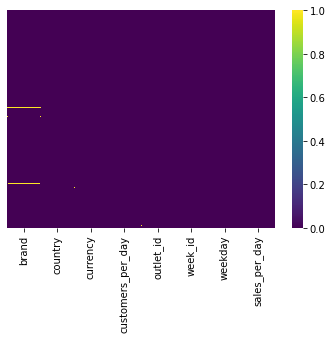

In [97]:
import seaborn as sns
#How df looks like?
sns.heatmap(df.isnull(),yticklabels=False, cbar=True, cmap='viridis')
##
df_lookslike(df)

## **3). Data Cleansing**

In [98]:
#Data Cleansing
#
#To fix messy oder missing data, i'd like to:
#Investigage the reason is this !recorded or doesn't exists?
#How many % of data is missing
#Discuss with an approach with source/concerned-team to build a consensus approach w.r.t Messy/missing data.
#Data Imputation: Either Update missing data with MEAN, try to guess, oder replace with a special characters/strings ('unknown')/0.
#The above line process called "imputation".
#
#Further, its NOT RECOMEND to remove Null/Missing Data until its in really small amount and major stackholder agree.

import seaborn as sns
df=df.replace(-999999.0,0)    #Replace ALL -99999 with 0 at DF Level----------------------------------
values = {'brand':'Unknown','country':'Unknown','currency':'Unknown','customers_per_day':0,'outlet_id':0,'week_id':0,'weekday':'Unknown','sales_per_day':0}
df=df.fillna(value=values)    #Exchange NULLs in ALL Columns with 'Unknown' Oder 0 at DF Level--------
df_lookslike(df)              #How dataframe looks like?
###

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 10946 to 11116
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              18207 non-null  object 
 1   country            18207 non-null  object 
 2   currency           18207 non-null  object 
 3   customers_per_day  18207 non-null  float64
 4   outlet_id          18207 non-null  float64
 5   week_id            18207 non-null  float64
 6   weekday            18207 non-null  object 
 7   sales_per_day      18207 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.3+ MB
            brand      country currency  ...  week_id  weekday  sales_per_day
10946  MediaMarkt  switzerland      CHF  ...     50.0      thu       56223.81
9531   MediaMarkt      austria     EURO  ...      7.0      sat       72235.83
17692  MediaMarkt      austria     EURO  ...     29.0      tue       51590.19
560    MediaMarkt        spain     EURO  ...

## **4). Data Vectorization**
Preparing Tensors (using HotOneEncoding)

In [99]:
# I am going to convert data into numeric values by using following technique und check the score for each case.
########################################################################################################################################
#Test Case-1:Integer Encoding   --Tried this one. But result was so far :(
#Test Case-2:OneHot Encoding    --Tried this one also its acceptable and looks better :)
#Test Case-2:Dummy Variable     Encoding.
################################################Test Case-1:Integer Encoding (Manually)#################################################
#df['brand']=df['brand'].map({'MediaMarkt':1,'Saturn':2,'Unknown':0})
#df['country']=df['country'].map({'germany':1,'switzerland':2,'austria':3,'netherlands':4,'spain':5,'greece':6,'Unknown':0})
#df['country']=df['country'].fillna(0)
#df['currency']=df['currency'].map({'TWO':2,'FOUR':4})
#df['weekday']=df['weekday'].map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7,'Unknown':0}) #Not ideal as changing weightage
#print(df['brand'].unique())
#df_lookslike(df)              #How dataframe looks like?
################################################Test Case-2:One-Hot Encoding (via Pandas Manually)######################################
#I noticed and learnt, when we use Integer based Encoding for countries ("Germany,Spain, etc"). Then weights are chaning.
# HotEncoding is better.
#df = pd.get_dummies(df, columns=['brand', 'country','weekday'])
################################################Test Case-3:Utilizing sklearn.preprocessing##############################################
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
df['brand']=label_enc.fit_transform(df['brand'])
df['country']=label_enc.fit_transform(df['country'])
df['currency']=label_enc.fit_transform(df['currency']) #Perhaps, later i drop it as i don't need. But lets see Heatmap based correlation.
df['weekday']=label_enc.fit_transform(df['weekday'])
print(df.head(5))


       brand  country  currency  ...  week_id  weekday  sales_per_day
10946      0        7         0  ...     50.0        5       56223.81
9531       0        1         1  ...      7.0        3       72235.83
17692      0        1         1  ...     29.0        6       51590.19
560        0        6         1  ...     31.0        2       52162.98
5230       1        6         1  ...     16.0        5       61176.34

[5 rows x 8 columns]


## **5). Data Correlation**
Analysis of Tensors Correlation/relationship (using HotOneEncoding)

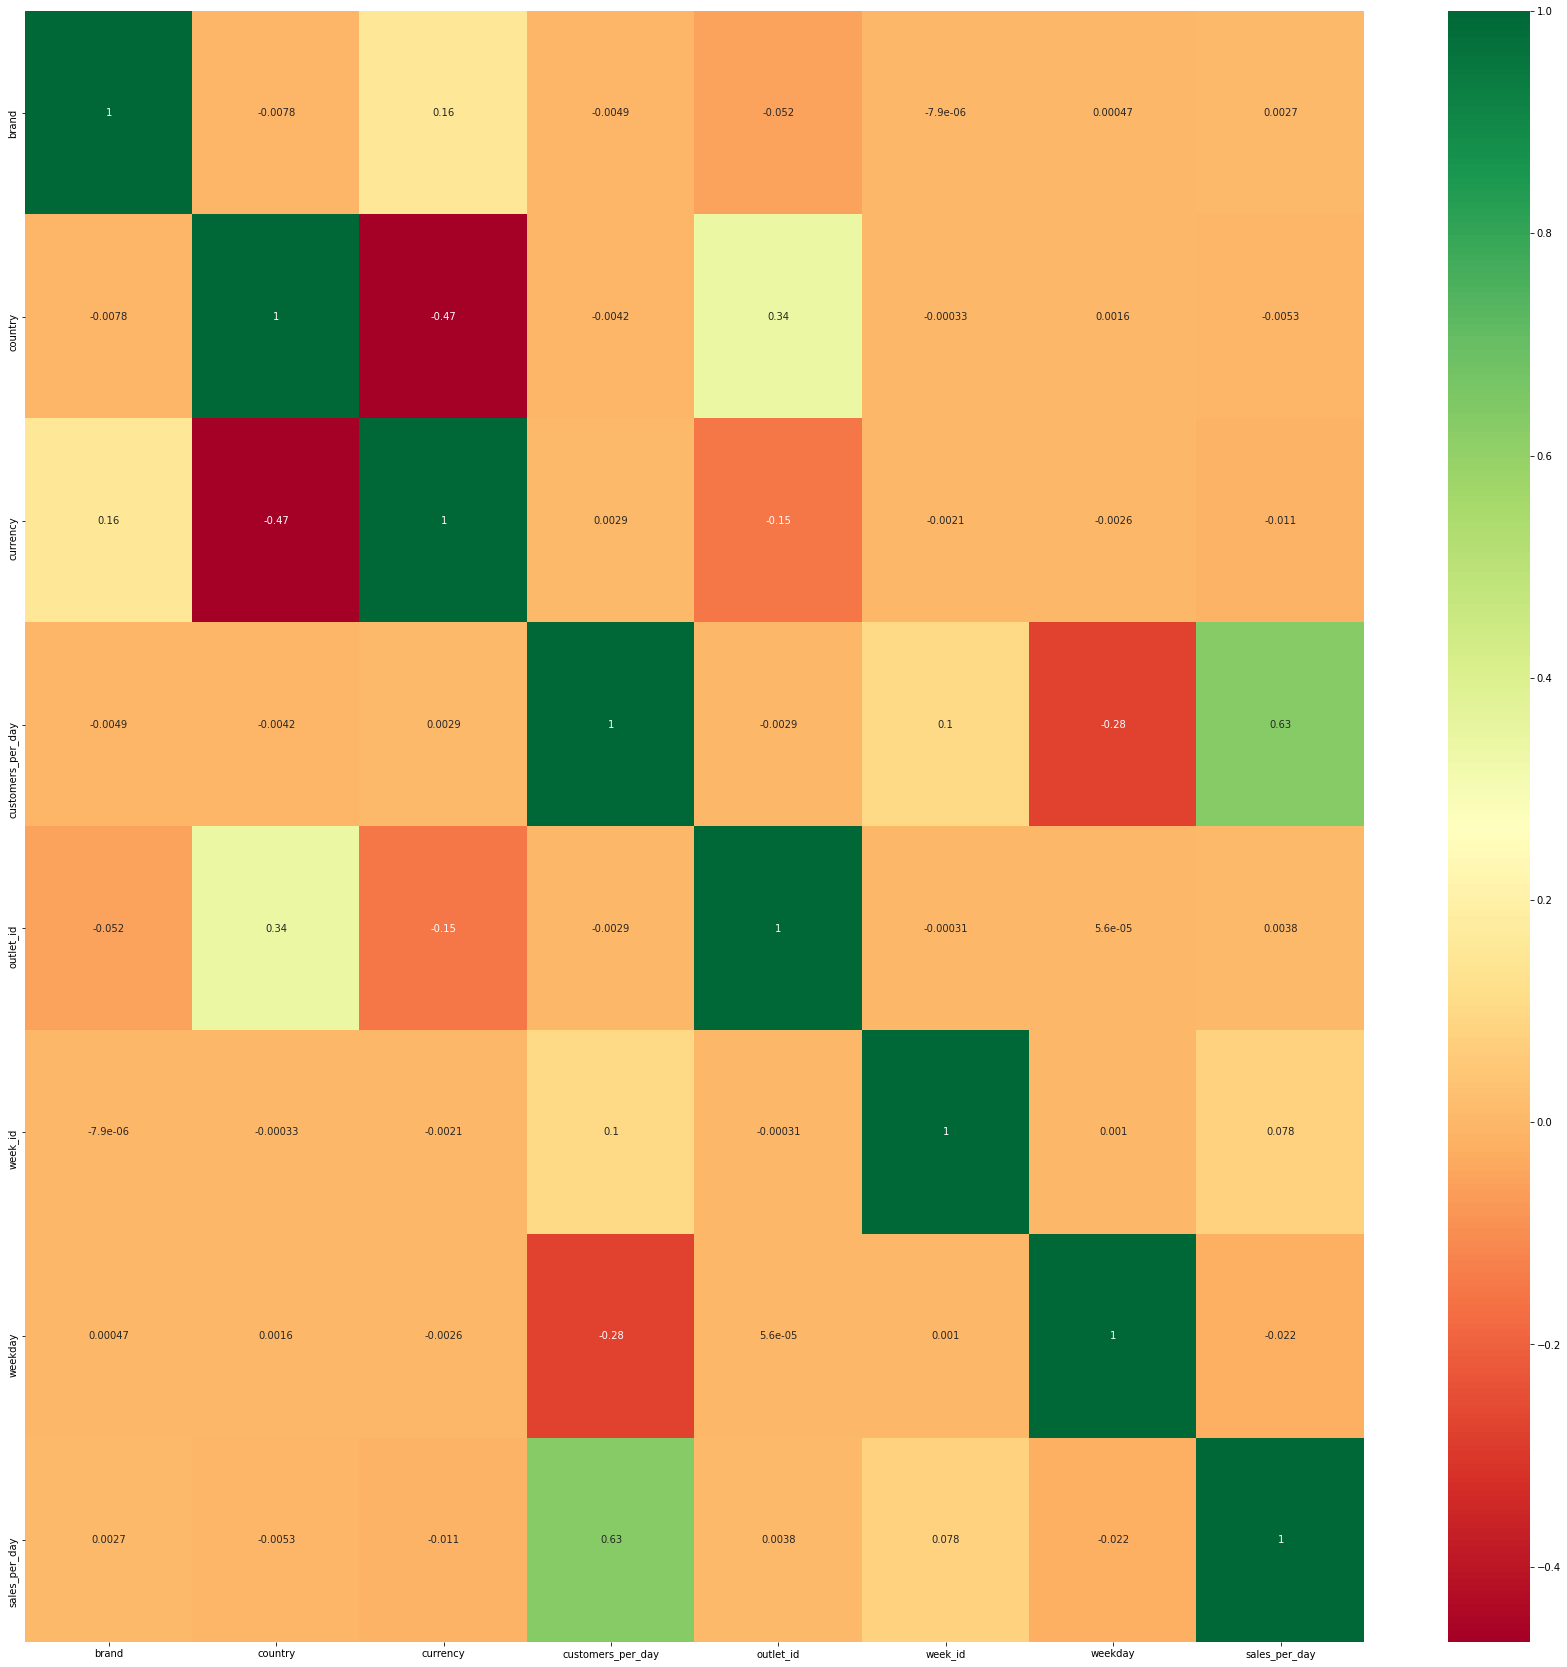

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
#Analyzing correlation among all columns and Heatmap.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?highlight=dataframe%20corr#pandas.DataFrame.corr
# Helpful video: https://www.youtube.com/watch?v=ZynCwbZfCgY
#Remeber: Mean/Median/Mode/Std/Variance are "UNIVARIATE" i.e. it can be extracted on single column values.
#You can't extract (Mean/Median/Mode/Std/Variance) for more than 01 column.
#The word "CO" represents the relationship/association b/w TWO columns.
#Correlation is always b/w +1 and -1. If a relationship is ZERO or NEGATIVE then you may delete it.
#
#Remember:
#Among Two or more dependent variables/Features should not have high Correlation/relatinship. Example: t-type of Salt in your meal.
#Thus, you'll have to remove one dependent variable/feature as both are doing the same task.
#
#It ML we are performing Feature Engineering AND analyzing relationship with Correlation. However, in DEEPLEARNING its auto done.
#

corrmat = df.corr(method='pearson',min_periods=5) #pearson : standard correlation coefficient,
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## **6). Feature Engineering**

In [101]:
#Identifying from the above Heatamp which columns are strongly correlated or weakly correlated.
#I observed The Correlation between following columns were very weak.
# 1). sales_per_day vs 'weekday'=-0.022 Its a very weak correlation/association. Thus, require deletion.
# 2). sales_per_day vs 'currency'=-0.011 Its a very weak correlation/association. Thus, require deletion.
# 3). sales_per_day vs 'currency'=-0.0053 ts a very weak correlation/association. Thus, require deletion.
# Now, i'm removing weak correlated/relationship Independent Variable from df.
#
df.drop(columns=['weekday','currency','country'], inplace=True)
#
#Linear regression is a way to model the relationship between two variables.
#The slope formula: Y = m*X + b
#
# Y: Dependent variable (i.e Sales_per_day)
# X: Independent variable (All others/Features)
# m: The slope (i.e. how steep the line goes)
# b: The y-intercept/point where line cut the Y-axis
# 
# 
#
#
# I have to predict "Sales_per_day". Thus, its the 'Dependent Variable' (Y) and all others are Independent variable (X).
#The folllowing approach is safe as you don't modify your DF instead prefer to seperate Dependent & Independent Variable.
#Y = df["sales_per_day"] #Lets save this (Dependent/Target Variable)column for later usage and remove it from df.
Y=(df.loc[:,df.columns=='sales_per_day']) #Lets take Dependent Variable/Target column from df.
X=(df.loc[:,df.columns!='sales_per_day']) #Lets take Independent Variable/ALL Features column from df.
print("How Y looks like:\n", Y.head(5))
print("How Features/X looks like:\n", X.head(5))
#

How Y looks like:
        sales_per_day
10946       56223.81
9531        72235.83
17692       51590.19
560         52162.98
5230        61176.34
How Features/X looks like:
        brand  customers_per_day  outlet_id  week_id
10946      0              633.0      421.0     50.0
9531       0             2561.0      339.0      7.0
17692      0              365.0      342.0     29.0
560        0              269.0      106.0     31.0
5230       1              342.0      108.0     16.0


## **7). Data Splitting (Training: 80%, Test: 20%)**

In [102]:
#The ideal situation is 1st SPLIT DATA then do the Normalization.
# If we do Normalization before the Data splitting then TEST/VALIDATION Data will also be exposed w.r.t to MEAN & STD.
#Which is absolutly NOT required/incorrect approach.

#For picture data Normalization:	We divide each value by its Higher pixel value (for colored pic 255) 
#For Discrete/number data Normalization:	We extract mean and std

#We can use following libraries to Normalize particular data.
#from sklearn.preprocessing import StandardScaler

#However, in sklearn function shuffel parameter by defaul is True. But Remember Timeseries data shouldn't be shuffel :)
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.8,random_state=0)
print("Training Data-x:/Features shape [80%]:\t:", x_train.shape)
print("Test Data-x/Features shape [20%]:", x_test.shape)

Training Data-x:/Features shape [80%]:	: (3641, 4)
Test Data-x/Features shape [20%]: (14566, 4)


## **8). Data Normalization**

In [103]:
#The ideal situation is 1st SPLIT DATA then do the Normalization.
# If we do Normalization before the Data splitting then TEST/VALIDATION Data will also be exposed w.r.t to MEAN & STD.
#Which is absolutly NOT required/incorrect approach.

#For picture data Normalization:	We divide each value by its Higher pixel value (for colored pic 255) 
#For Discrete/number data Normalization:	We extract mean and std

#We can use following libraries to Normalize particular data.
#from sklearn.preprocessing import StandardScaler
#Analyzing how DF looks like in pre-normalization phase.

print("Pre Normalization X Training data:\n",x_train.head(5))
print("Pre Normalization X Test data:\n",x_test.head(5))


#I'v checked there are following one columns who's data is too high/low.
#Thus, I'm Normalizing them in individaul DF (Training/Test/Validation).

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train[['customers_per_day']] = sc.fit_transform(x_train[['customers_per_day']])
x_test[['customers_per_day']] = sc.fit_transform(x_test[['customers_per_day']])

print("Post Normalization X Training data:\n",x_train.head(5))
print("Post Normalization X Test data:\n",x_test.head(5))

Pre Normalization X Training data:
        brand  customers_per_day  outlet_id  week_id
17161      1             1357.0      582.0     37.0
8009       0                0.0       52.0     22.0
2573       0              261.0      652.0     23.0
15180      0              399.0      694.0     11.0
10212      0              599.0      598.0     41.0
Pre Normalization X Test data:
        brand  customers_per_day  outlet_id  week_id
11219      1                0.0      298.0     14.0
4249       0              368.0      100.0      6.0
3129       0              282.0      342.0     16.0
1018       0              367.0      509.0     43.0
13161      0              568.0      598.0     10.0
Post Normalization X Training data:
        brand  customers_per_day  outlet_id  week_id
17161      1           0.469601      582.0     37.0
8009       0          -1.085908       52.0     22.0
2573       0          -0.786727      652.0     23.0
15180      0          -0.628540      694.0     11.0
10212      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

## **9). USING MACHINE LEARNING (Linear Regresssion)**
i). Analyzing Model Score with Train Data & Test Data

In [104]:
#Building Regression Model by using Machine learning
#
#Linear Models: https://scikit-learn.org/stable/modules/linear_model.html
#
#Case-1): LinearRegression by using ML
#
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(x_train,y_train) #We are training.
#LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False)
#
print('LR-Train score:',LR_model.score(x_train,y_train))
print('LR-Test score:' ,LR_model.score(x_test,y_test))
##returns the coefficient of determination or R². Its maximum is 1. The higher the R² value, the better the fit.
#
#coeff_df = pd.DataFrame(LR_model.coef_, X.columns, columns=['Coefficient'])
#print("Coefficient:",coeff_df)
##returns the coefficient of determination or R². Its maximum is 1.
#The higher the R² value, the better the fit.
#y_pred = LR_model.predict(x_test)

LR-Train score: 0.40772369761057203
LR-Test score: 0.3931906197514007


## **9). USING MACHINE LEARNING (Error Analysis AE, MSE, MSRE)**

In [105]:
from sklearn import metrics
print('Mean A.Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean S.Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root M.Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MSQ oder the difference between the original values and the predicted values is coming too high :(
#Evaluate the Model

NameError: ignored

## **10). USING DEEP LEARNING (Linear Regresssion)**
i). Building DL Model

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [107]:
MMS_Predict_PRModel = Sequential()

MMS_Predict_PRModel.add(layers.Dense(10, activation='relu', kernel_regularizer =regularizers.l2(0.02), input_shape=(x_train.shape[1],)))
MMS_Predict_PRModel.add(layers.Dense(8, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
MMS_Predict_PRModel.add(layers.Dense(6, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
MMS_Predict_PRModel.add(layers.Dense(4, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
#I'm passing 01-Neuron but do not specify Activation function as its Regression.
#However, for Binary-Classification i am also using 01-Neurons and Sigmoid/probability as Activation function as as output is Binary.
MMS_Predict_PRModel.add(layers.Dense(1))

## **10). USING DEEP LEARNING (Compiling DL Model)**

In [108]:
from tensorflow import keras
#Preparing parameters for Optimizer.
opt = keras.optimizers.RMSprop(learning_rate=0.01) #I want lowest learning rate as higher accuracy required.
MMS_Predict_PRModel.compile(optimizer=opt, loss='mse', metrics='mae')

## **10). USING DEEP LEARNING (Training/Fitting DL Model)**

In [109]:
#history = MMS_Predict_PRModel.fit(x_train,y_train, batch_size=16, verbose=0, epochs=200, validation_data=(x_valid_20, y_valid_20))
#As i didn't prepare validation data set. Thus, i'm providing TestData.
Model_history = MMS_Predict_PRModel.fit(x_train,y_train, batch_size=16, verbose=0, epochs=200, validation_data=(x_test, y_test))

In [110]:
epochs = range(1, 201)
train_mae = Model_history.history['mae']
val_mae = Model_history.history['val_mae']

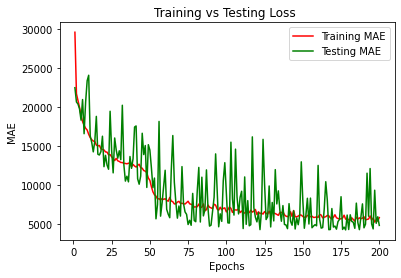

In [111]:
plt.plot(epochs, train_mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'g', label='Testing MAE')
plt.title('Training vs Testing Loss ')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## **10). USING DEEP LEARNING (Actual vs Predicted Data)**

In [112]:
print('Predicted Sale:\n',MMS_Predict_PRModel.predict(x_test))

Predicted Sale:
 [[  187.86972]
 [53683.16   ]
 [56793.582  ]
 ...
 [56302.844  ]
 [59114.08   ]
 [60355.61   ]]


## **10). USING DEEP LEARNING (Mean Error (AE, SE, MSE)**

In [114]:
test_mse_score, test_mae_score  =MMS_Predict_PRModel.evaluate(x_test, y_test)

456/456 [==============================] - 0s 953us/step - loss: 45885016.0000 - mae: 4801.1040


# Conculsion:

In [115]:
#Evaluate the Model

#1. I used Machine learning, Deeplearning (normalizationa, auto featuring). Still need time
#2. Perhpas more data required,
#3. Bad guess
#4. Feature improper selection

#Leider, nicht 100% erfolgreich. Ich brauche auch mehr learnen und unbung machen!#


# COMMENTS & SUGGESTIONS

# You are welcome!

In [116]:
# Prediction Model developed by:
# Khurram Nazir
# khurram.deutsch@yahoo.com
# Munich, Germany

## Modelling
Choose a suitable model for predicting the sales_per_day and validating the prediction accuracy. Train and test the model.

In [ ]:
# TODO ... Python coding ... 

## Business Problem
What other retail data could be relevant to predict the sales_per_day? Give at least 5 different examples and explain in 2-3 sentences why they could be interesting to add to the model.

In [ ]:
# TODO ... write down your ideas ...

# Architecture 

Now pretend you need to build a system which runs the model and should be able to make realtime predictions of the sales per day, everytime new data is generated by the source systems.  
You need to design (a) data pipeline(s) which transfers the data from either the sourcesystems or BigQuery to the prediction engine in the format the model/prediction engine can handle it. 

There are the following preconditions: 
    
    - There are 3 source systems: 
        - System A: System which handles __sales_per_day__ --> API Connector (Real-Time possible)
        - System B: Delivers customers_per_day --> Flat File on SFTP Server once per Day per batch
        - System C: Stores brand, country, currency and outled_id --> BigQuery    
        - You want to enable realtime predictions
    
    - You can use any component you like and would use for that use case. Please add to each logical component for your architecture a respective tool or GCP service. (e.g. for the logical component ETL a tool named Google Dataflow)

Please describe how your architecure would look like with an architecture picture. Describe how the different components will be connected and communicate. Please elaborate why you have choosen a certain logical component + tooling. We expect a moderate level of details within the architecture 

# Send it to us
In the end, please send us: 
    - The ipython notebook 
    - An detailed description of your architecture + an architecture picture (PDF). 